In [86]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
first_part = pd.read_csv('Data/Covid-19 Twitter Dataset (Apr-Jun 2020).csv')
second_part = pd.read_csv('Data/Covid-19 Twitter Dataset (Apr-Jun 2021).csv')
third_part = pd.read_csv('Data/Covid-19 Twitter Dataset (Aug-Sep 2020).csv')

data = pd.concat([first_part, second_part, third_part])
data = data.sample(n=100000, replace=False, random_state=42)

In [88]:
#filtering Data
data_filtered = data.drop(columns=['id', 'created_at', 'source', 'user_mentions', 'lang', 'place', 'original_text',
                                   'favorite_count', 'retweet_count', 'original_author', 'compound', 'neg', 'neu', 'pos', 'sentiment'])
data_filtered

,hashtags,clean_tweet
77480,NaN,presid trump travel week diagnos covid19 sept ...
124798,COVID19,three stori england lockdown eas delay juli pu...
39675,NaN,know citi chicago interact test map find covid...
26610,"AWS, DataLake, COVID19, BigData, Analytics, Da...",public analysi data via
85352,NaN,start cost save safeti measur juvenil justic p...
...,...,...
94066,NaN,morn ask anybodi care iowa covid19 dead subhea...
75849,"IndiaFightsCorona, 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗𝒆, StaySafe",follow
10145,NaN,africa covid19 case africa cdc
118143,NaN,hockey canada foundat launch million dollar fu...


In [89]:
#preparing Data

def concat_tweet_hashtag(record):
    if  type(record['hashtags']) is str:
        return str(str(record['clean_tweet']) + ' ' + str(record['hashtags']))
    return str(record['clean_tweet'])

data_filtered['tweet_hashtag'] = data_filtered.apply(concat_tweet_hashtag, axis=1)
data_filtered = data_filtered.drop(columns=['clean_tweet', 'hashtags'])
df = data_filtered

In [90]:
#cleaning data
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['tweet_hashtag'] = df['tweet_hashtag'].apply(clean_text)
df

,tweet_hashtag
77480,presid trump travel week diagnos sept trump h...
124798,three stori england lockdown eas delay juli pu...
39675,know citi chicago interact test map find test...
26610,public analysi data via aws datalake bigdata ...
85352,start cost save safeti measur juvenil justic p...
...,...
94066,morn ask anybodi care iowa dead subheadlin telli
75849,follow indiafightscorona 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗𝒆 stay...
10145,africa case africa cdc
118143,hockey canada foundat launch million dollar fu...


In [91]:
# Tokenizing
import nltk

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df['tweet_hashtag'] = df['tweet_hashtag'].apply(lambda x: tokenizer.tokenize(x))
df

,tweet_hashtag
77480,"[presid, trump, travel, week, diagnos, sept, t..."
124798,"[three, stori, england, lockdown, eas, delay, ..."
39675,"[know, citi, chicago, interact, test, map, fin..."
26610,"[public, analysi, data, via, aws, datalake, bi..."
85352,"[start, cost, save, safeti, measur, juvenil, j..."
...,...
94066,"[morn, ask, anybodi, care, iowa, dead, subhead..."
75849,"[follow, indiafightscorona, 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗𝒆, ..."
10145,"[africa, case, africa, cdc]"
118143,"[hockey, canada, foundat, launch, million, dol..."


In [92]:
# stopwords removal
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = list(set(stopwords.words('english')))
    words = [w for w in text if w not in stop_words]
    return words
df['tweet_hashtag'] = df.apply(remove_stopwords)
df

,tweet_hashtag
77480,"[presid, trump, travel, week, diagnos, sept, t..."
124798,"[three, stori, england, lockdown, eas, delay, ..."
39675,"[know, citi, chicago, interact, test, map, fin..."
26610,"[public, analysi, data, via, aws, datalake, bi..."
85352,"[start, cost, save, safeti, measur, juvenil, j..."
...,...
94066,"[morn, ask, anybodi, care, iowa, dead, subhead..."
75849,"[follow, indiafightscorona, 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗𝒆, ..."
10145,"[africa, case, africa, cdc]"
118143,"[hockey, canada, foundat, launch, million, dol..."


In [93]:
# combining texts

def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

df['tweet_hashtag'] = df['tweet_hashtag'].apply(lambda x: combine_text(x))
df

,tweet_hashtag
77480,presid trump travel week diagnos sept trump ho...
124798,three stori england lockdown eas delay juli pu...
39675,know citi chicago interact test map find test ...
26610,public analysi data via aws datalake bigdata a...
85352,start cost save safeti measur juvenil justic p...
...,...
94066,morn ask anybodi care iowa dead subheadlin telli
75849,follow indiafightscorona 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗𝒆 stay...
10145,africa case africa cdc
118143,hockey canada foundat launch million dollar fu...


In [94]:
#vectorizing data
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
df_vec = count_vec.fit_transform(df['tweet_hashtag'])
df_vec

<100000x50557 sparse matrix of type '<class 'numpy.int64'>'
	with 907983 stored elements in Compressed Sparse Row format>

In [95]:
#Exracting words with frequencies

features = count_vec.get_feature_names_out()

data_words = pd.DataFrame()
data_words['word'] = count_vec.get_feature_names_out()
data_words['frequency'] = np.asarray(df_vec.sum(axis=0)).ravel()
data_words = data_words.sort_values(by='frequency', ascending=False)
data_words

,word,frequency
47226,vaccin,8917
6917,case,7829
30346,new,7595
44176,test,6120
33415,peopl,5827
...,...,...
4602,bhula,1
25027,leann,1
25026,leaner,1
25025,leandro,1


In [96]:
#find sentiment

def set_sentiment(x):
    polarity = TextBlob(x).sentiment[0]
    if polarity < 0:
        return 'neg'
    elif polarity == 0:
        return 'neu'
    else:
        return 'pos'

data_words['sentiment'] = data_words['word'].apply(lambda x: set_sentiment(x))
data_words

,word,frequency,sentiment
47226,vaccin,8917,neu
6917,case,7829,neu
30346,new,7595,pos
44176,test,6120,neu
33415,peopl,5827,neu
...,...,...,...
4602,bhula,1,neu
25027,leann,1,neu
25026,leaner,1,neu
25025,leandro,1,neu


In [97]:
# check all feelings
all_words = data_words['sentiment'].value_counts()
all_words

neu    50146
neg      214
pos      197
Name: sentiment, dtype: int64

,word,frequency,sentiment
47226,vaccin,8917,neu
6917,case,7829,neu
30346,new,7595,pos
44176,test,6120,neu
33415,peopl,5827,neu
10983,death,4884,neu
32758,pandem,4376,neu
19101,health,3993,neu
17268,get,3794,neu
37179,report,3752,neu


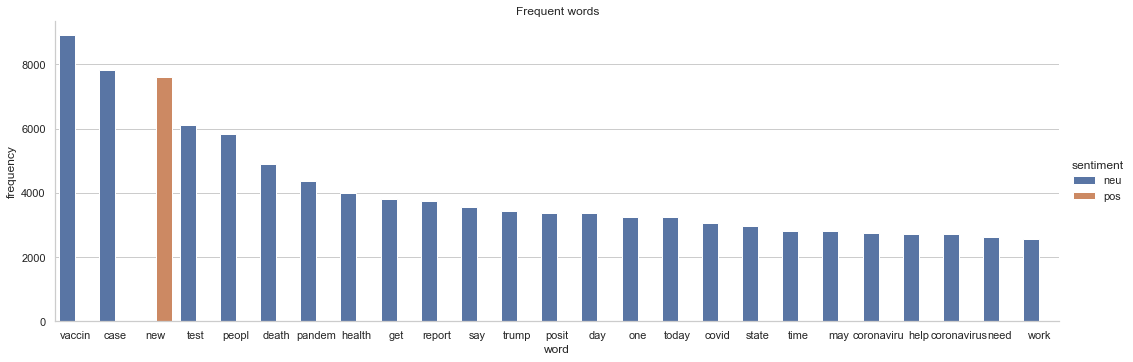

In [98]:
# words with the highest frequency
length = 25
frequent_words = data_words[:length]

sns.catplot(kind="bar", data=frequent_words, x="word", y="frequency", hue="sentiment", aspect=3).set(title='Frequent words')
frequent_words

,word,frequency,sentiment
30346,new,7595,pos
15726,first,2141,pos
25625,live,1356,pos
17774,good,1286,pos
16388,free,1096,pos
38488,safe,1041,pos
37673,right,1027,pos
24861,latest,962,pos
41213,social,938,pos
18066,great,902,pos


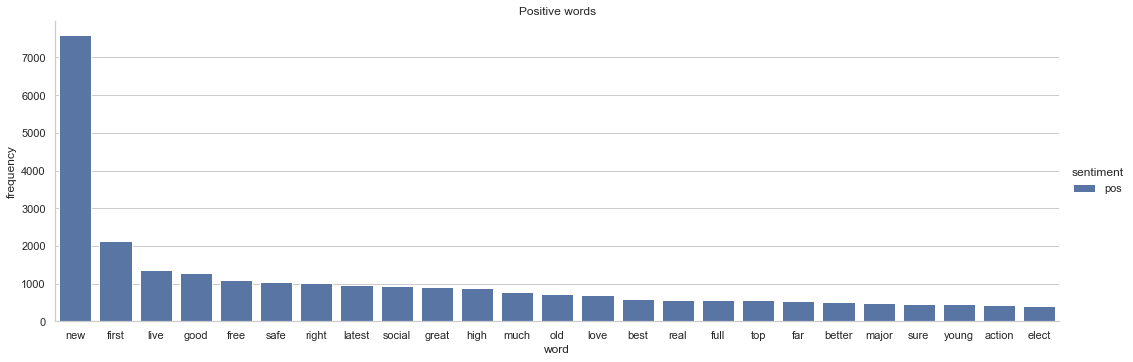

In [99]:
# positive words

positive_words = data_words[data_words.sentiment == 'pos'][:25]

sns.catplot(kind="bar", data=positive_words, x="word", y="frequency", hue="sentiment", aspect=3).set(title='Positive words')
positive_words

,word,frequency,sentiment
12946,due,2304,neg
25893,long,841,neg
27476,mean,622,neg
7249,center,530,neg
3822,base,529,neg
25051,least,498,neg
18802,hard,482,neg
4958,black,474,neg
41007,small,433,neg
32243,other,405,neg


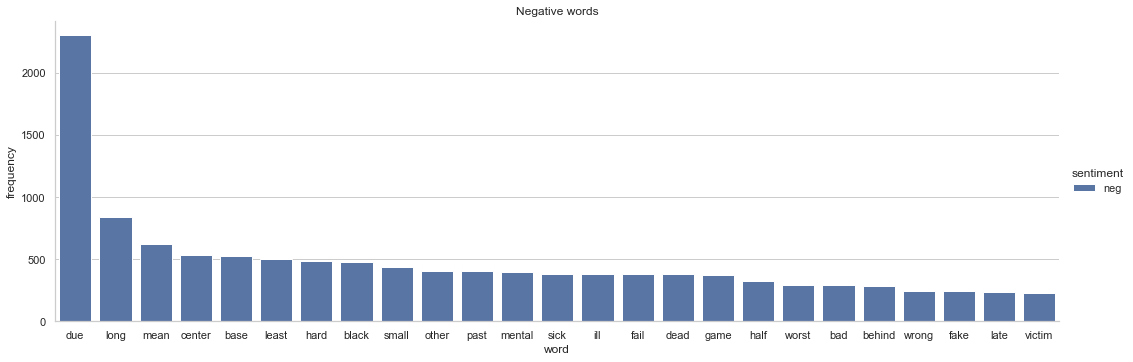

In [100]:
# negative words

negative_words = data_words[data_words.sentiment == 'neg'][:25]
sns.catplot(kind="bar", data=negative_words, x="word", y="frequency", hue="sentiment", aspect=3).set(title='Negative words')
negative_words

,word,frequency,sentiment
47226,vaccin,8917,neu
6917,case,7829,neu
44176,test,6120,neu
33415,peopl,5827,neu
10983,death,4884,neu
32758,pandem,4376,neu
19101,health,3993,neu
17268,get,3794,neu
37179,report,3752,neu
39073,say,3569,neu


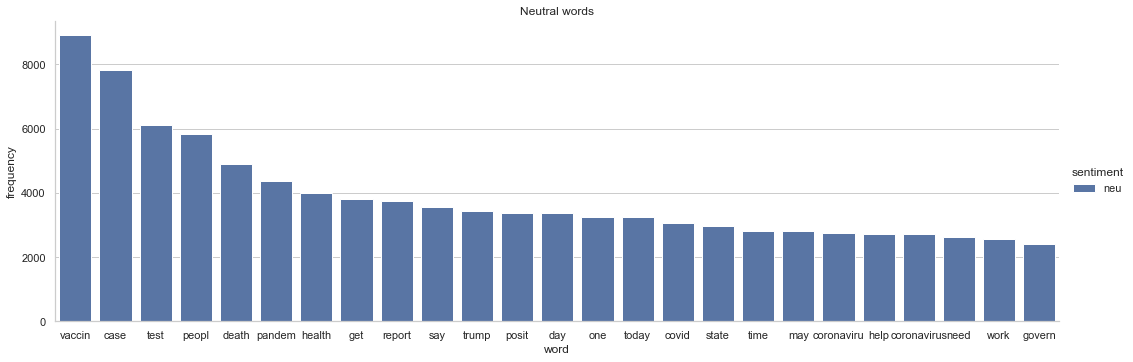

In [101]:
# neutral words
neutral_words = data_words[data_words.sentiment == 'neu'][:25]
sns.catplot(kind="bar", data=neutral_words, x="word", y="frequency", hue="sentiment", aspect=3).set(title='Neutral words')
neutral_words